In [9]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import numpy as np 
from numpy import *
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb

In [19]:
df = pd.read_csv("train.csv")
df.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64

In [20]:
coded_df = df.apply(LabelEncoder().fit_transform)


In [21]:
X = np.array(coded_df.iloc[:,0:20]).astype(np.float32)
y = np.array(coded_df.iloc[:,20:21]).astype(np.float32).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(5284, 20)
(5284,)


In [22]:
model = Sequential([
    Dense(20, activation = 'relu', name = 'first_layer'),
    Dense(10, activation = 'selu', name = 'second_layer'),
    Dense(4, activation = 'softmax', name = 'last_layer')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
    optimizer=tf.keras.optimizers.Adam(0.04), #This is the more powerful optimizer than gradient descent. It can automatically adjust the learning rate alpha.
    metrics = ['accuracy']
)

model.fit(
    
    X_train,y_train,
    epochs= 10
)



Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


166/166 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.9080
Epoch 2/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9455
Epoch 3/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9428
Epoch 4/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9455
Epoch 5/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9449
Epoch 6/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9464
Epoch 7/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9461
Epoch 8/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9457
Epoch 9/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9459
Epoch 10/10
166/166 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9457


In [23]:
model.evaluate(X_test, y_test)
model.summary()

82/82 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9493
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                420       
                                                                 
 second_layer (Dense)        (None, 10)                210       
                                                                 
 last_layer (Dense)          (None, 4)                 44        
                                                                 
Total params: 674
Trainable params: 674
Non-trainable params: 0
_________________________________________________________________


82/82 [==============================] - 0s 1ms/step


Text(33.0, 0.5, 'Truth')

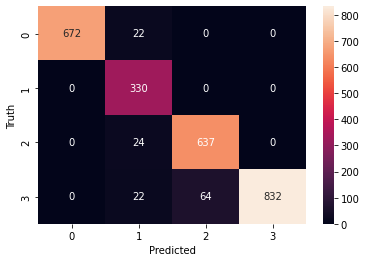

In [24]:
y_prediction = model.predict(X_test)
confuse = []
for i in range (len(X_test)):
    confuse.append(np.argmax(y_prediction[i]))
conf_matrix = np.array(tf.math.confusion_matrix(labels=y_test, predictions=confuse))
sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

0.9496734537072609


Text(33.0, 0.5, 'Truth')

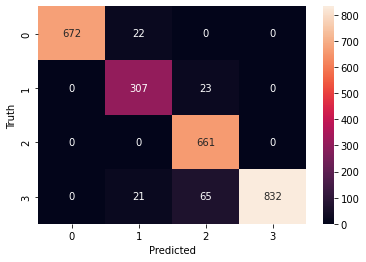

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(max_depth=11, random_state=150)
rf.fit(X_train, y_train)

rfcm = confusion_matrix(y_test, rf.predict(X_test).flatten())
print(rf.score(X_test, y_test))

sb.heatmap(rfcm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

0.9496734537072609


Text(33.0, 0.5, 'Truth')

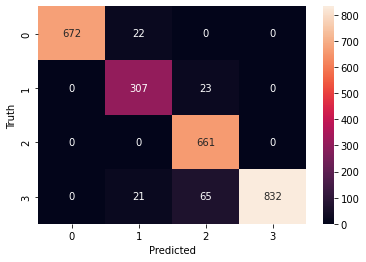

In [27]:
import xgboost as xgb

xg = xgb.XGBClassifier(random_state=10000).fit(X_train, y_train)

xgcm = confusion_matrix(y_test, xg.predict(X_test).flatten())
print(xg.score(X_test, y_test))

sb.heatmap(xgcm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

All 3 models predicted very accurately with accuracies over 94%. Random Forest and XGBoost perform identically on this data.
